<a href="https://colab.research.google.com/github/preritt/Embed/blob/master/Clean_04162019_DnadatasetReducedAdam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import tensorflow as tf

In [0]:
# Load data
train_data = np.load('X_train.npy')
train_label = np.load('y_train.npy')
validation_data = np.load('X_validation.npy')
validation_label = np.load('y_validation.npy')
test_data = np.load('X_test.npy')
test_label = np.load('y_test.npy')

In [0]:
# Visualize data
train_data_pandas = pd.DataFrame(train_data)
train_data_labels = pd.DataFrame(train_label)
train_data_pandas.head()

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,-0.677234,-0.205123,-0.482950,-0.491417,0.074036,0.120849,-0.106411,-0.854025,0.235618,-0.724818,...,-0.452475,-0.076587,0.065689,-0.204755,0.719114,-0.415737,0.151107,-0.278909,-0.022437,0.116028
1,-0.968325,-0.901980,-0.612648,-0.320269,0.900248,-1.070258,-0.276023,-1.350481,-0.307156,0.873546,...,-0.062500,0.312353,-0.154037,-0.097274,-0.028025,-0.198132,-0.364496,0.373894,-0.262713,-0.031868
2,-1.144510,-0.639640,0.094091,0.736130,-0.741035,1.317996,-0.332095,1.514341,-0.697174,0.793378,...,-0.052664,0.234666,0.514637,0.379384,-0.415597,-0.251387,-0.249521,-0.048087,0.846899,-0.228373
3,1.011300,-0.753063,1.140482,-1.568935,0.673132,0.256885,-1.308196,-0.929054,-1.467942,0.812135,...,0.005383,0.306471,0.055101,0.238929,-0.382544,0.214989,-0.098546,0.089057,0.111130,-0.350712
4,-0.019436,0.294622,1.569688,0.488142,-0.463129,-0.929467,-1.738224,-0.145351,0.004826,-1.081979,...,0.014322,0.062022,0.049797,-0.140120,-0.348128,-0.529818,-0.252468,-0.330608,-0.000366,0.567040


In [0]:
train_data_labels.head()

,0
0,1
1,1
2,1
3,2
4,2


In [0]:
test_data.shape

(1186, 138)

In [0]:
validation_data.shape

(600, 138)

#### Combine Validation and train data for MLP classifier - and set validation fraction to 4500/15000 = 0.3

In [0]:
train_valid_combined = np.concatenate((train_data, validation_data))
train_valid_combined.shape

(2000, 138)

In [0]:
train_valid_label = np.concatenate((train_label, validation_label))


#### Fit MLP Classifier

In [0]:
# clf = MLPClassifier(hidden_layer_sizes=(104),validation_fraction=0.3)
# clf.fit(train_data, train_label)

## without using vaidation data for fitting

In [0]:
# train_label.shape

In [0]:
clf =MLPClassifier(hidden_layer_sizes=(138, ), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)

# Test set score: 0.950119


clf.fit(train_data, train_label)

Iteration 1, loss = 0.97153027
Iteration 2, loss = 0.38995267
Iteration 3, loss = 0.16863707
Iteration 4, loss = 0.08644866
Iteration 5, loss = 0.04790676
Iteration 6, loss = 0.02766120
Iteration 7, loss = 0.01804213
Iteration 8, loss = 0.01303306
Iteration 9, loss = 0.01017363
Iteration 10, loss = 0.00846074
Iteration 11, loss = 0.00731784
Iteration 12, loss = 0.00642295
Iteration 13, loss = 0.00578566
Iteration 14, loss = 0.00524263
Iteration 15, loss = 0.00482185
Iteration 16, loss = 0.00445585
Iteration 17, loss = 0.00415009
Iteration 18, loss = 0.00387484
Iteration 19, loss = 0.00363059
Iteration 20, loss = 0.00342359
Iteration 21, loss = 0.00324253
Iteration 22, loss = 0.00306885
Iteration 23, loss = 0.00291664
Iteration 24, loss = 0.00277493
Iteration 25, loss = 0.00265069
Iteration 26, loss = 0.00253650
Iteration 27, loss = 0.00242954
Iteration 28, loss = 0.00233327
Iteration 29, loss = 0.00224341
Iteration 30, loss = 0.00215908
Iteration 31, loss = 0.00208097
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(138,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=10, warm_start=False)

#### Train Accuracy

In [0]:
clf.score(train_data,train_label)

1.0

#### Validation Accuracy

In [0]:
clf.score(validation_data,validation_label)

0.9483333333333334

#### Test accuracy

In [0]:
clf.score(test_data,test_label)

0.9258010118043845

#### Tensorflow model using weights initialized from numpy model

In [0]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc.fit(train_label.reshape(1,-1).T)
train_label_one_hot = enc.transform(train_label.reshape(-1,1))
test_label_one_hot = enc.transform(test_label.reshape(-1,1))
validation_label_one_hot = enc.transform(validation_label.reshape(-1,1))
validation_test_label_one_hot = enc.transform(train_valid_label.reshape(-1,1))

In [0]:
# train_label_one_hot.shape

In [0]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
# hid_neuron = [90]

In [0]:
test_label_one_hot.shape

(1186, 3)

#### Base NN model in tensor flow

#### 16 -> 104 -> 26

## Train baseline model in tensorflow

In [0]:
#

In [0]:
train_data_labels.shape

(1400, 1)

In [0]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [0]:
output_shape = train_label_one_hot.shape[1]

In [0]:
# np.float32(clf.intercepts_ [1]).shape

In [0]:
## Define weights of the layer

G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))


saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#### Rerun the same thing in tensorflow

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
learning_rate = 0.001
num_steps = 20000
batch_size = 200
train_losses = []
test_acc = []
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
#     layer_2 = tf.matmul(layer_1, G_W2) + G_b2
#     layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    return out_layer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

  ### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % 1000 == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
            if step%1000 == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letter44')
                test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_Accuracy), "%")
    print("Valid acc=",str(best_accuracy_valid), "%")

    print("="*50)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training loss= 0.00044579685, training acc= 100.0%
Validation Accuracy 94.83333587646484 ...

step 1000, training loss= 1.891845e-06, training acc= 100.0%
Validation Accuracy 94.83333587646484 ...

step 2000, training loss= 5.352492e-07, training acc= 100.0%
Validation Accuracy 94.83333587646484 ...

step 3000, training loss= 1.5914436e-07, training acc= 100.0%
Validation Accuracy 94.83333587646484 ...

step 4000, training loss= 9.357928e-08, training acc= 100.0%
Validation Accuracy 94.66666412353516 ...

step 5000, training loss= 5.0067896e-08, training acc= 100.0%
Validation Accuracy 94.66666412353516 ...

step 6000, training loss= 2.6822088e-08, training acc= 100.0%
Validation Accuracy 94.66666412353516 ...

step 7000, training loss= 6.5565104e-09, training acc= 100.0%
Validation Accurac

In [0]:
validation_data.shape

(600, 138)

## Divide valid in two parts for validation and validation-test

In [0]:
validation_label_one_hot.shape

(600, 3)

In [0]:
train_label_one_hot.shape

(1400, 3)

In [0]:
valid_validation_data = validation_data[0:550,:]
valid_validation_data_label = validation_label_one_hot[0:550,:]
valid_test_data = validation_data[550:,:]
valid_test_data_label = validation_label_one_hot[550:,:]

#### My model with feedback

In [0]:
output_shape = train_label_one_hot.shape[1]

In [0]:
# num_hidden_neurons

In [0]:
## Define weights of the layer
G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))

num_hidden_neurons = 138
GwLoop = tf.Variable(xavier_init([output_shape,num_hidden_neurons]))
G_bLoop = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GwLoop2 = tf.Variable(xavier_init([num_hidden_neurons,num_hidden_neurons]))
G_bLoop2 = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GLossW = tf.Variable(xavier_init([output_shape,output_shape]))
GLossb= tf.Variable(tf.zeros(shape=[output_shape]))
saver = tf.train.Saver()

## Best Tuned, Use W1 = 2, W2 =1, W3 =  0from best validation accuracy found below

In [0]:
validation_data.shape

(600, 138)

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
num_steps = 50000
batch_size = 200
train_losses = []
test_acc = []
val_accuracy = []
train_accuracy = []


# for h in hid_neuron:
#     num_hidden_neurons=h
learning_rate = 0.001
plot_every = 50


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]


wLoss1 = 2
wLoss2 = 1
wLoss3 = 0
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            train_accuracy.append(train_acc)
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
            val_accuracy.append(validation_accuracy)
            if step%plot_every == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letter44')
                G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
#                     test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
#         print("Test acc=",str(test_Accuracy), "%")
    print("Valid acc=",str(best_accuracy_valid), "%")
    ValidAccuracy_Track.append(best_accuracy_valid)
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)

#     validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
#     ValidAccuracy_Test_track.append(validation_test_accuracy)
#     print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
    print("="*50)
    print("W1 = {} ...".format(wLoss1))
    print("W2 = {} ...".format(wLoss2))
    print("W3 = {} ...".format(wLoss3))

    print("*"*50)
    print("="*50)

step 0, training loss= 0.011436516, training acc= 100.0%
Validation Accuracy 94.5 ...

step 50, training loss= 0.000562717, training acc= 100.0%
Validation Accuracy 93.33333587646484 ...

step 100, training loss= 0.0006226911, training acc= 100.0%
Validation Accuracy 93.66666412353516 ...

step 150, training loss= 0.0003201904, training acc= 100.0%
Validation Accuracy 94.16666412353516 ...

step 200, training loss= 0.0003113033, training acc= 100.0%
Validation Accuracy 94.0 ...

step 250, training loss= 0.00029998634, training acc= 100.0%
Validation Accuracy 94.0 ...

step 300, training loss= 0.00023336831, training acc= 100.0%
Validation Accuracy 94.0 ...

step 350, training loss= 0.00020245374, training acc= 100.0%
Validation Accuracy 94.0 ...

step 400, training loss= 0.00018713533, training acc= 100.0%
Validation Accuracy 94.0 ...

step 450, training loss= 0.0001720381, training acc= 100.0%
Validation Accuracy 94.0 ...

step 500, training loss= 0.00013138202, training acc= 100.0%
V

In [0]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from scipy.signal import savgol_filter

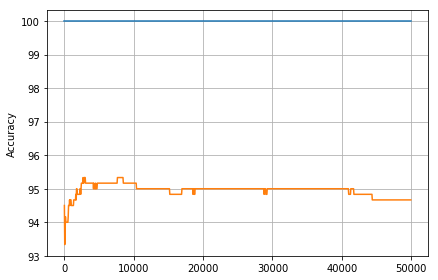

In [0]:
steps_plot =  [step for step in range(0, num_steps, plot_every)]
plt.plot(steps_plot, 100*np.asarray(train_accuracy))
plt.plot(steps_plot, val_accuracy)

# plt.plot(steps_plot, savgol_filter(100*np.asarray(train_accuracy),51,1))  
# plt.plot(steps_plot, savgol_filter(np.asarray(val_accuracy),51,1))
plt.tight_layout()
# plt.xticks(np.arange(min(steps_plot), max(steps_plot)+1, 2000))
plt.ylabel('Accuracy')
plt.grid(abs)
plt.show()

In [0]:
# valid_accuracy_filtered = savgol_filter(np.asarray(val_accuracy),51,1)
valid_accuracy_filtered = val_accuracy#savgol_filter(np.asarray(val_accuracy),51,1)

print(max(valid_accuracy_filtered))
valid_accuracy_filtered_np = np.asarray(valid_accuracy_filtered)
print(np.argmax(valid_accuracy_filtered))
print(steps_plot[np.argmax(valid_accuracy_filtered)])

95.33333
54
2700


In [0]:
print(train_label_one_hot.shape)
print(train_valid_combined.shape)

(10500, 26)
(15000, 16)


In [0]:
# keep aside 
aside_examples= 200
aside_valid_test = train_valid_combined[-aside_examples:]
aside_valid_test_label = validation_test_label_one_hot[-aside_examples:]
combined_train_valid = train_valid_combined[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = validation_test_label_one_hot[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
aside_valid_test.shape

(200, 138)

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
num_steps = 300000
batch_size = 200
train_losses = []
test_acc = []
val_accuracy = []
train_accuracy = []


# for h in hid_neuron:
#     num_hidden_neurons=h
learning_rate = 0.001
plot_every = 1000


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]


wLoss1 = 2
wLoss2 = 1
wLoss3 = 0
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            train_accuracy.append(train_acc)
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
            val_accuracy.append(validation_accuracy)
            if step%plot_every == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letter44')
                G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
#                     test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
#         print("Test acc=",str(test_Accuracy), "%")
    print("Valid acc=",str(best_accuracy_valid), "%")
    ValidAccuracy_Track.append(best_accuracy_valid)
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)

#     validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
#     ValidAccuracy_Test_track.append(validation_test_accuracy)
#     print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
    print("="*50)
    print("W1 = {} ...".format(wLoss1))
    print("W2 = {} ...".format(wLoss2))
    print("W3 = {} ...".format(wLoss3))

    print("*"*50)
    print("="*50)

step 0, training loss= 0.009674838, training acc= 100.0%
Validation Accuracy 92.0 ...

step 1000, training loss= 0.00016782759, training acc= 100.0%
Validation Accuracy 92.5 ...

step 2000, training loss= 4.503897e-05, training acc= 100.0%
Validation Accuracy 92.5 ...

step 3000, training loss= 2.2373619e-05, training acc= 100.0%
Validation Accuracy 92.5 ...

step 4000, training loss= 1.1938162e-05, training acc= 100.0%
Validation Accuracy 92.5 ...

step 5000, training loss= 6.903675e-06, training acc= 100.0%
Validation Accuracy 92.5 ...

step 6000, training loss= 3.5833905e-06, training acc= 100.0%
Validation Accuracy 92.5 ...

step 7000, training loss= 2.0142277e-06, training acc= 100.0%
Validation Accuracy 92.5 ...

step 8000, training loss= 1.3887827e-06, training acc= 100.0%
Validation Accuracy 92.5 ...

step 9000, training loss= 6.369739e-07, training acc= 100.0%
Validation Accuracy 92.5 ...

step 10000, training loss= 4.442527e-07, training acc= 100.0%
Validation Accuracy 92.5 .

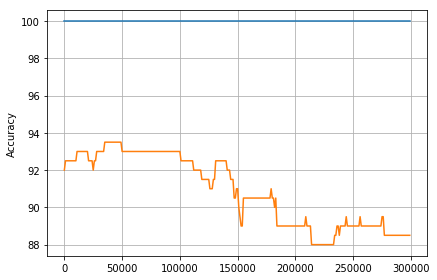

In [0]:
steps_plot =  [step for step in range(0, num_steps, plot_every)]
plt.plot(steps_plot, 100*np.asarray(train_accuracy))
plt.plot(steps_plot, val_accuracy)

# plt.plot(steps_plot, savgol_filter(100*np.asarray(train_accuracy),51,1))  
# plt.plot(steps_plot, savgol_filter(np.asarray(val_accuracy),51,1))
plt.tight_layout()
# plt.xticks(np.arange(min(steps_plot), max(steps_plot)+1, 2000))
plt.ylabel('Accuracy')
plt.grid(abs)
plt.show()

In [0]:
# valid_accuracy_filtered = savgol_filter(np.asarray(val_accuracy),51,1)
valid_accuracy_filtered = val_accuracy#savgol_filter(np.asarray(val_accuracy),51,1)

print(max(valid_accuracy_filtered))
valid_accuracy_filtered_np = np.asarray(valid_accuracy_filtered)
print(np.argmax(valid_accuracy_filtered))
print(steps_plot[np.argmax(valid_accuracy_filtered)])

93.5
35
35000


#### Now retrain on this appended test data till 100 steps

In [0]:
# keep aside 
aside_examples= 100
aside_valid_test = train_valid_combined[-aside_examples:]
aside_valid_test_label = validation_test_label_one_hot[-aside_examples:]
combined_train_valid = train_valid_combined[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = validation_test_label_one_hot[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 35000
# num_steps = 20000

batch_size = 200
train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 100

learning_rate = 0.001


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 2
wLoss2 = 1
wLoss3 = 0
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            
            train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
            train_accuracy.append(train_acc_total)
            train_losses.append(train_loss_total)
            print("step " + str(step) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
            validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
            print("ValidTest acc1=",str(validationTest_accuracy), "%")
    
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
    saver.save(sess, './Pendigit')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

step 0, training loss Total= 0.09546514, training acc total= 98.84210228919983%
ValidTest acc1= 91.0 %
step 100, training loss Total= 0.0017772395, training acc total= 100.0%
ValidTest acc1= 93.0 %
step 200, training loss Total= 0.0010503164, training acc total= 100.0%
ValidTest acc1= 93.0 %
step 300, training loss Total= 0.0007682197, training acc total= 100.0%
ValidTest acc1= 94.0 %
step 400, training loss Total= 0.0006004941, training acc total= 100.0%
ValidTest acc1= 94.0 %
step 500, training loss Total= 0.00048381425, training acc total= 100.0%
ValidTest acc1= 94.0 %
step 600, training loss Total= 0.00040132581, training acc total= 100.0%
ValidTest acc1= 94.0 %
step 700, training loss Total= 0.0003365717, training acc total= 100.0%
ValidTest acc1= 94.0 %
step 800, training loss Total= 0.00028801398, training acc total= 100.0%
ValidTest acc1= 94.0 %
step 900, training loss Total= 0.0002479779, training acc total= 100.0%
ValidTest acc1= 94.0 %
step 1000, training loss Total= 0.00021

In [0]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    test_accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_accuracy), "%")

INFO:tensorflow:Restoring parameters from ./Pendigit
ValidValid acc= 99.0 %
Test acc= 94.77235 %


In [0]:
import scipy.io
best_weights = {'G_W1': G_W1np, 'G_b1': G_b1np,'G_W2': G_W2np, 'G_b2': G_b2np}
scipy.io.savemat('HarFullDataset03212019_sgd', best_weights)

## Verify handover works

In [0]:
valid_validation_data_label.shape

(600, 3)

## Hyperparameter tuning by splitting valid into two sets

In [0]:
train_valid_combined.shape

(2000, 138)

In [0]:
train_data.shape

(1400, 138)

In [0]:
valid_validation_data_label.shape

(550, 3)

In [0]:
val

In [0]:
## Building the graph
# saver = tf.train.Saver()
hid_neuron = [90]
num_steps = 30000
batch_size = 200
train_losses = []
test_acc = []
plot_every = 100
learning_rate = 0.001


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
weights = {
    'h1': tf.Variable(np.float32(clf.coefs_[0])),
    'out': tf.Variable(np.float32(clf.coefs_[1]))
}
biases = {
    'b1': tf.Variable(np.float32(clf.intercepts_ [0])),
    'out': tf.Variable(np.float32(clf.intercepts_ [1]))
}
saver = tf.train.Saver()
W_track = []
ValidAccuracy_Track = []
ValidAccuracy_Test_track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]
    
for wL1 in range(1,5):
  for WL2 in range(1,wL1+1):
    for WL3 in range(0,2):

        wLoss1 = wL1
        wLoss2 = WL2
        wLoss3 = WL3
        loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
        loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
        loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

        loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

        train_op = optimizer.minimize(loss)
        correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

        ### Initialization and running the model
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            best_accuracy_valid = 0
            for step in range(0, num_steps):
                batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
                sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
                if step % plot_every == 0:
                    train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                    print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
                    train_losses.append(train_loss)
                    validation_accuracy = sess.run(accuracy*100, feed_dict={X: valid_validation_data,Y:valid_validation_data_label})
                    if step%plot_every == 0:
                      print("Validation Accuracy valid {} ...".format(validation_accuracy))
                      print()
                      if (validation_accuracy >= best_accuracy_valid):
                        best_accuracy_valid = validation_accuracy
                        saver.save(sess, './statlog_letter44')
                        G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
            print("Valid acc=",str(best_accuracy_valid), "%")
            ValidAccuracy_Track.append(best_accuracy_valid)
            this_params = G_W1np, G_b1np, G_W2np, G_b2np
            W_track.append(this_params)
            # code for checking accuracy of valid_test
            validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
            ValidAccuracy_Test_track.append(validation_test_accuracy)
            print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
            print("="*50)
            print("W1 = {} ...".format(wLoss1))
            print("W2 = {} ...".format(wLoss2))
            print("W3 = {} ...".format(wLoss3))

            print("*"*50)
            print("="*50)

step 0, training loss= 0.11390518, training acc= 100.0%
Validation Accuracy valid 94.90908813476562 ...

step 100, training loss= 0.0006654033, training acc= 100.0%
Validation Accuracy valid 93.63636016845703 ...

step 200, training loss= 0.00041993908, training acc= 100.0%
Validation Accuracy valid 93.81818389892578 ...

step 300, training loss= 0.00036581428, training acc= 100.0%
Validation Accuracy valid 94.36363220214844 ...

step 400, training loss= 0.00024466272, training acc= 100.0%
Validation Accuracy valid 94.7272720336914 ...

step 500, training loss= 0.000278986, training acc= 100.0%
Validation Accuracy valid 94.54545593261719 ...

step 600, training loss= 0.00020484207, training acc= 100.0%
Validation Accuracy valid 94.54545593261719 ...

step 700, training loss= 0.00020485155, training acc= 100.0%
Validation Accuracy valid 94.54545593261719 ...

step 800, training loss= 0.00014808222, training acc= 100.0%
Validation Accuracy valid 94.36363220214844 ...

step 900, training 

#### Valid acc= 98.799995 %
#### Validation Accuracy Test 98.51380157470703 ...
W1 = 4 ...
W2 = 1 ...
W3 = 0 ...
Highest validation accuracy, to brake tie Validation test accuracy was used which is highest for this combination

#### Hyperparameter tuning

In [0]:
max(ValidAccuracy_Test_track)

92.0

In [0]:
# W_track[np.argmax((ValidAccuracy_Track))]

In [0]:
max(ValidAccuracy_Track)

95.81818

In [0]:
import matplotlib.pyplot as plt

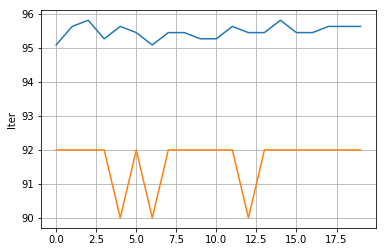

In [0]:
plt.plot(ValidAccuracy_Track)
plt.plot(ValidAccuracy_Test_track)

plt.ylabel('Iter')
plt.grid(abs)
plt.show()

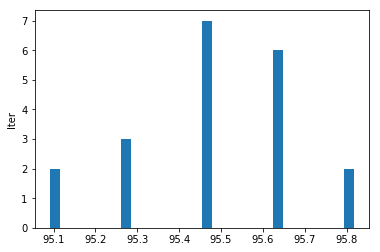

In [0]:
plt.hist([ValidAccuracy_Track],bins=30)
plt.ylabel('Iter')
plt.show()

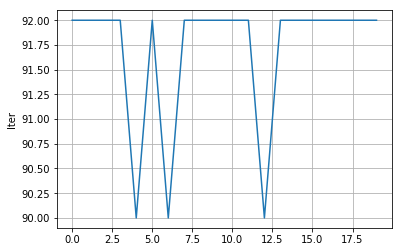

In [0]:
plt.plot(ValidAccuracy_Test_track)
plt.ylabel('Iter')
plt.grid(abs)
plt.show()

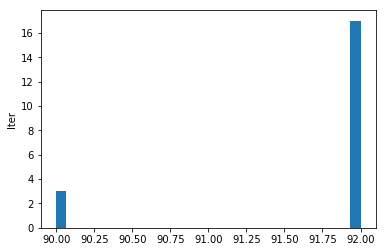

In [0]:
plt.hist([ValidAccuracy_Test_track],bins=30)
plt.ylabel('Iter')
plt.show()